# **AIN 214 - PA5 - FALL 2024**




**Student Number** :Şeyma DOĞAN

**Name Surname**   :2230765034


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 03.01.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **CLUSTERING**


This assignment aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering and explore the impact of PCA on these clustering techniques.

---
**Dataset Path:** "Data/wholesale_customers_data.csv"
---

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

***Variables***

* FRESH: annual spending (m.u.) on fresh products (Continuous);
* MILK: annual spending (m.u.) on milk products (Continuous);
* GROCERY: annual spending (m.u.)on grocery products (Continuous);
* FROZEN: annual spending (m.u.)on frozen products (Continuous)
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
* CHANNEL: customers Channel - (Hotel/Restaurant/Cafe) (Nominal)
* REGION: customers Region  (Lisnon, Oporto or Other) (Nominal)




# **Necessary Imports**

In [1]:
# Import required libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# **PART- 1: Data Preprocessing and Visualization (20 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Analyze  the dataset and explain analysis results
* Check and handle missing values and outliers
* Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.



In [562]:
# Load the dataset
df = pd.read_csv('Data\wholesale_customers_data.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Seyma\AppData\Local\Temp\ipykernel_27620\1810548769.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('Data\wholesale_customers_data.csv')


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [564]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



No missing values were found in the dataset, as shown below:

In [565]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

To decide on which method I will use to handle outliers I visualize the data set to see what kind of distribution it has:

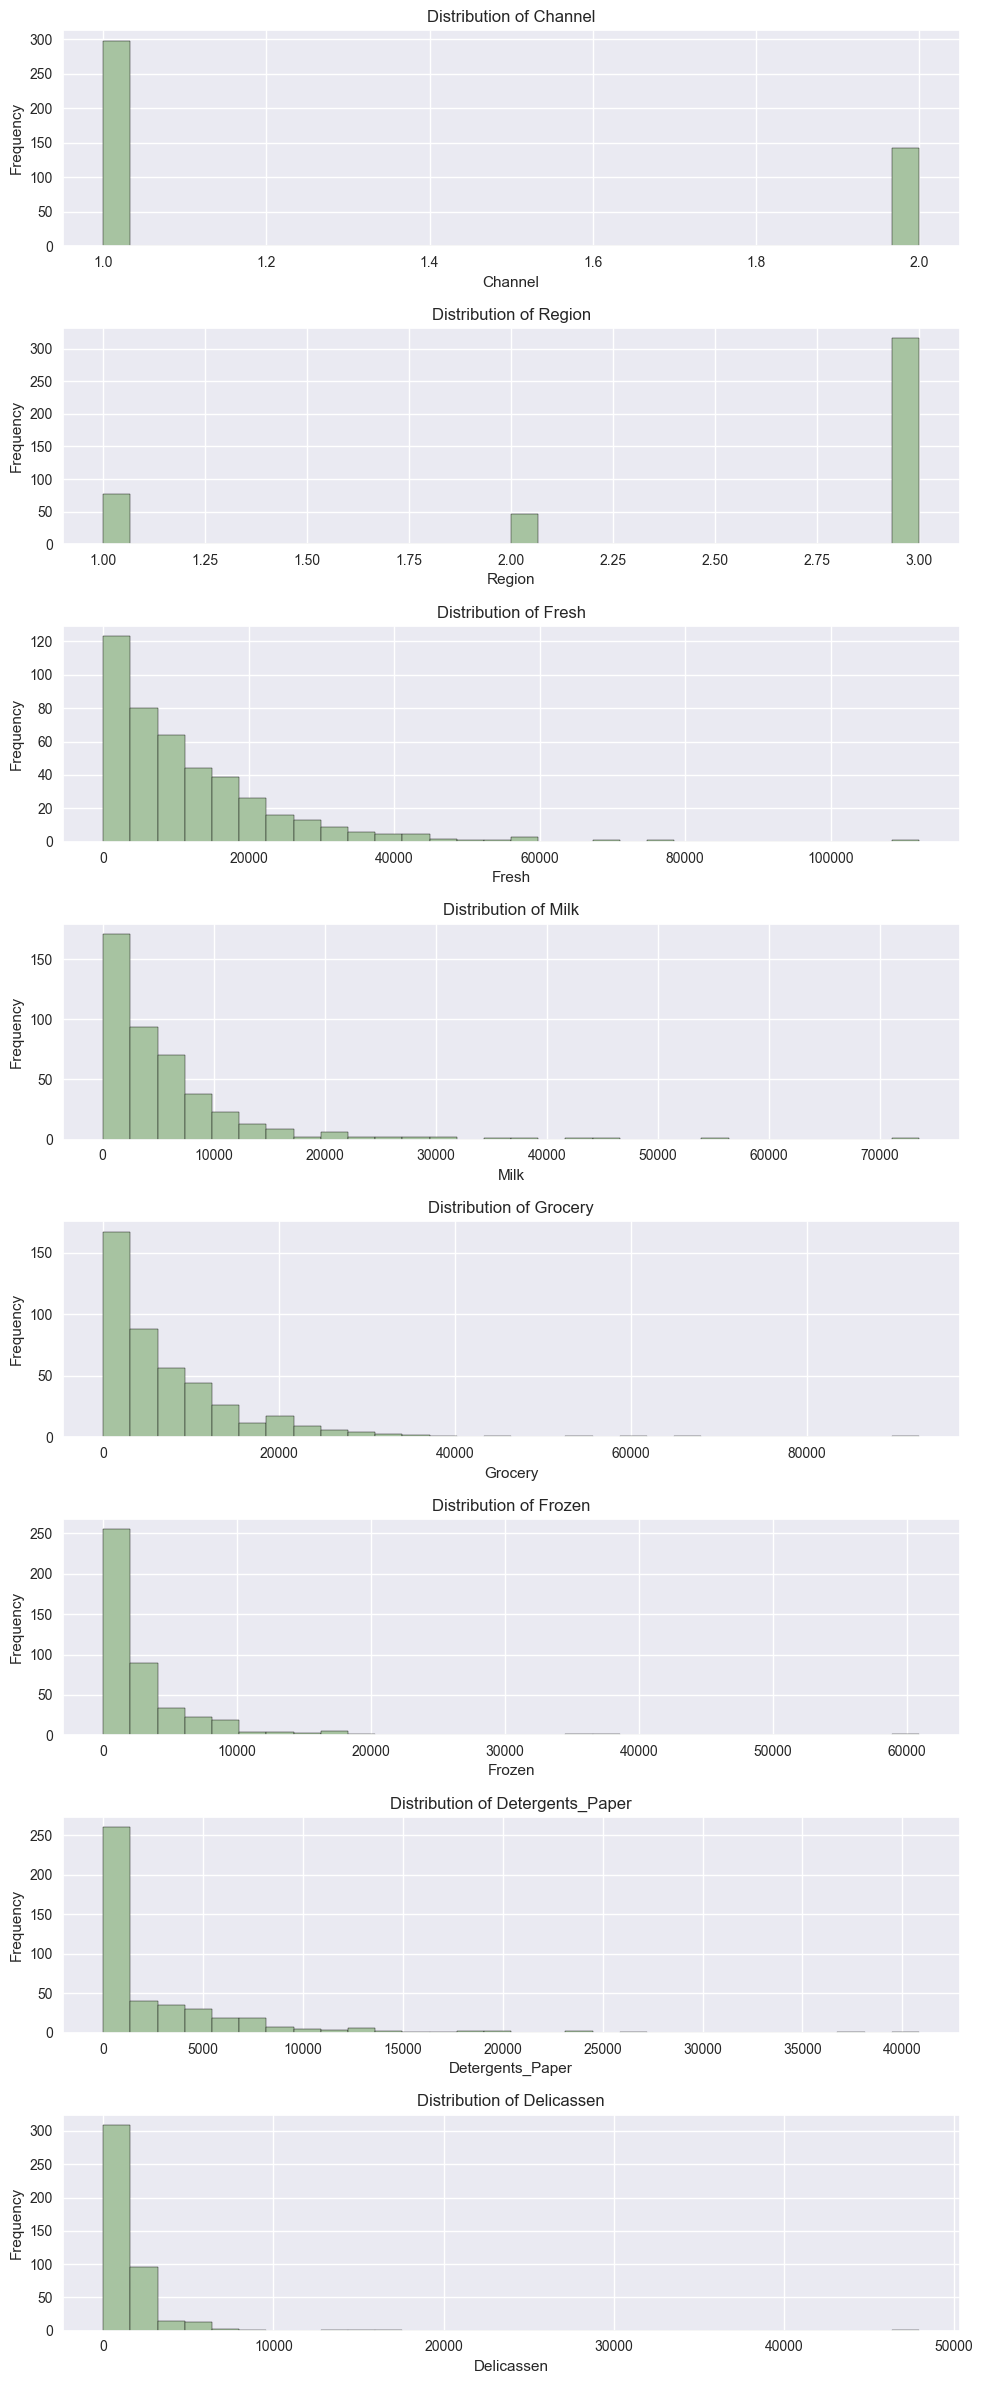

In [566]:
nrows = 8 
fig, axes = plt.subplots(nrows=nrows, figsize=(10, 3 * nrows))  # Adjust figure size 

# Iterate through each column and prepare histogram for each column distribution
for i, column in enumerate(df.head(nrows)): 
    axes[i].hist(df[column], bins=30, color='#A7C3A1', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

* The data is heavily right-skewed, indicating that most customers spend less on average, with a few 
customers making significantly higher purchases.
* The Grocery, Milk and Fresh purchases has smoother graphs than Frozen, Detergent Paper and Delicassen. 
This suggests that customers are spending on these products more regularly and predictably, and these 
categories are taking a more important place in customer baskets. 
* Also we see different Regions. And Region 1 and 2 have fewer customer records. We can think a few probilities:
  * They could be the ones that are making higher purchases that are coming from a richer region.
  * There could be lesser people living at that regions. 

Data set has a right skewed distribution so I will use IQR to detect outliers. 
Because IQR is a better detection way than Z-score. 
And I will use median imputation to not change the distribution's shape significantly.

In [567]:
# IQR calculation:

df_IQR = df.copy() # Copy the dataset to prevent data leak

Q1 = df_IQR.quantile(0.25) # Calculate the first quartile
Q3 = df_IQR.quantile(0.75) # Calculate the last quartile
IQR = Q3 - Q1 # Calculate the Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR 
outliers_IQR = ((df_IQR < lower_bound) | (df_IQR > upper_bound))
outliers_any = outliers_IQR.any(axis=1) # Check if any row contains an outlier
outliers_IQR = df[outliers_any]

print(f"There are {len(outliers_IQR)} outliers detected by IQR.")
print(f"Outliers from IQR:\n {outliers_IQR}\n")

There are 108 outliers detected by IQR.
Outliers from IQR:
      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
2          2       3   6353   8808     7684    2405              3516   
4          2       3  22615   5410     7198    3915              1777   
17         1       3   5876   6157     2933     839               370   
22         1       3  31276   1917     4469    9408              2381   
23         2       3  26373  36423    22019    5154              4337   
..       ...     ...    ...    ...      ...     ...               ...   
427        1       3  31012  16687     5429   15082               439   
431        1       3   8533   5506     5160   13486              1377   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   

     Delicassen  
2          7844  
4          5185  
17       

In [568]:
# Outlier imputation with median

# Iterate over numerical columns (starting from the 3rd column)
# Cause I don't want to change the Chanel and Region.
# They can be seen as numeric but they are categoric that are encoded.
# They include important information we don't want to lose by applying median imputation.
for column in df.columns[2:]: 
    median_value = df[column].median()  # Calculate the median for the current column
    df.loc[outliers_any, column] = median_value # Replace outliers in the current column with the median

print("Outliers detected by IQR have been imputed with the median.")

Outliers detected by IQR have been imputed with the median.


C:\Users\Seyma\AppData\Local\Temp\ipykernel_27620\1994449178.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4755.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_any, column] = median_value # Replace outliers in the current column with the median
C:\Users\Seyma\AppData\Local\Temp\ipykernel_27620\1994449178.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '816.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_any, column] = median_value # Replace outliers in the current column with the median
C:\Users\Seyma\AppData\Local\Temp\ipykernel_27620\1994449178.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '965.5' has dtype 

I prefer standardization for transforming my data. Since my dataset was initially right-skewed and I applied IQR-based median imputation, the distribution has likely become more Gaussian-like. Standardization, which centers the data around zero and scales it to unit variance, is generally more suitable for algorithms like PCA and K-means.

My experiments also support this preference. When I compared standardization to normalization, I observed a decrease in silhouette scores, indicating poorer clustering quality with normalization. This suggests that standardization better preserves the underlying data structure for these algorithms.

In [569]:
# Normalization:
normalized_df = preprocessing.normalize(df)  
normalized_df_with_col = pd.DataFrame(normalized_df, index=df.index, columns=df.columns)

# Standarization:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of features
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

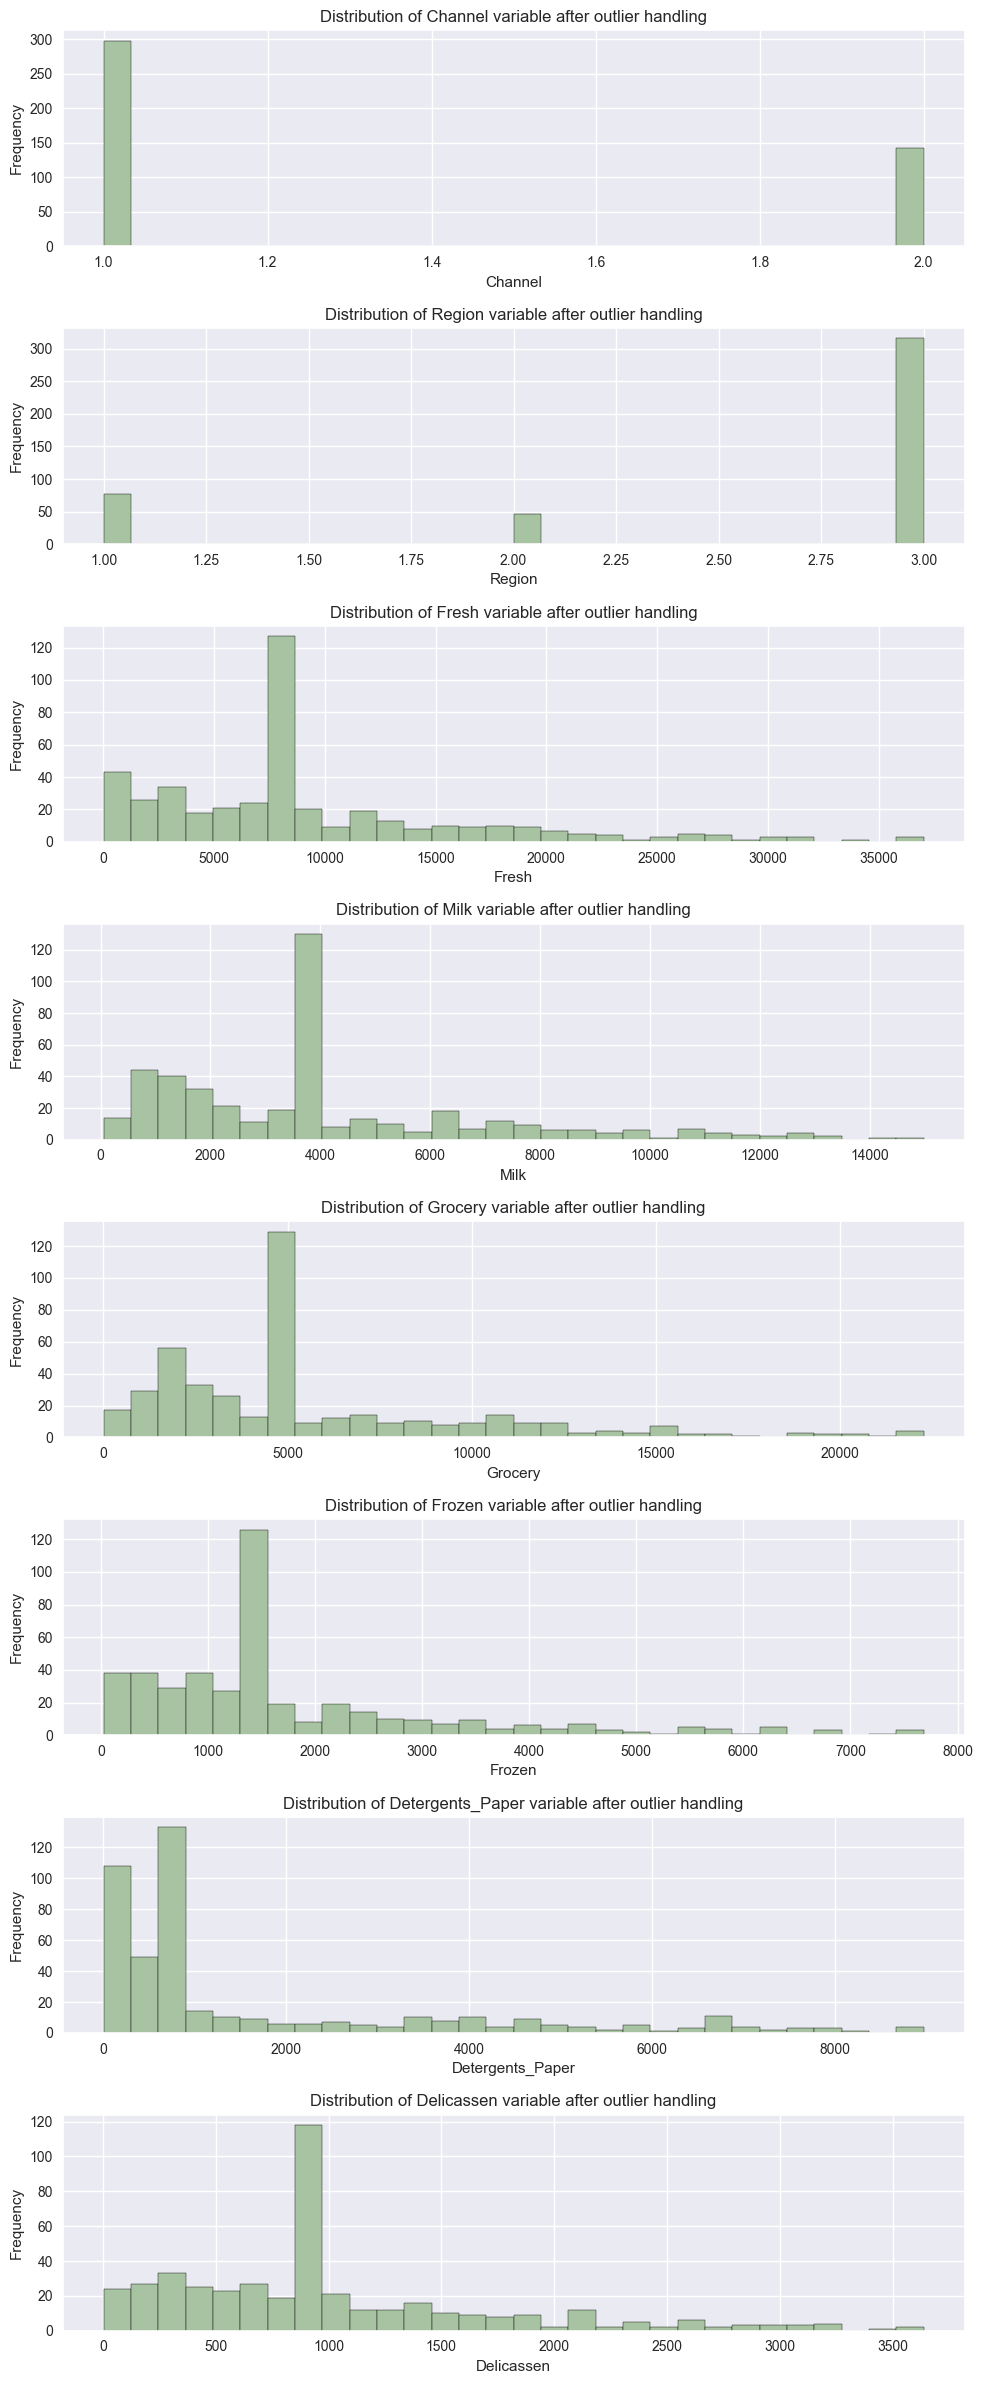

In [570]:
nrows = 8 
fig, axes = plt.subplots(nrows=nrows, figsize=(10, 3 * nrows))  # Adjust figure size 

# Iterate through each column and prepare histogram for each column distribution
for i, column in enumerate(df.head(nrows)): 
    axes[i].hist(df[column], bins=30, color='#A7C3A1', edgecolor='black')
    axes[i].set_title(f'Distribution of {column} variable after outlier handling')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

As seen in the distribution of the variables after outlier treatment, the data appears more Gaussian-like. 
This benefits following analyses such as PCA and K-means clustering, which often perform better with data approximating a normal distribution.

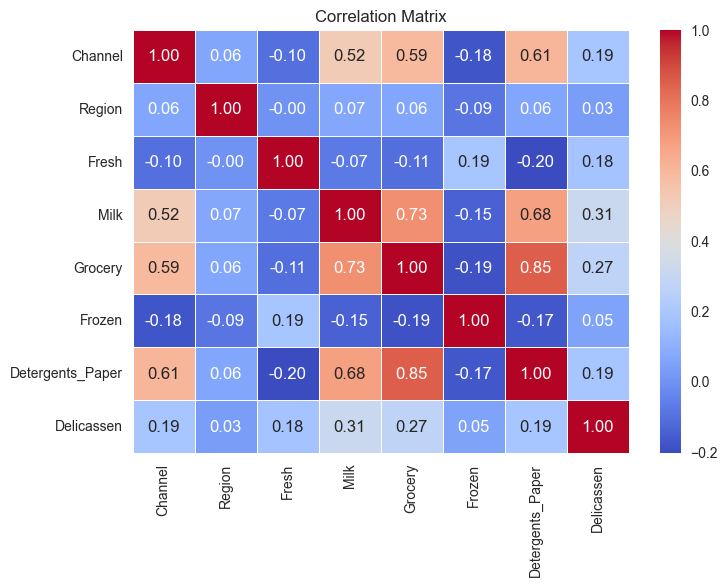

In [571]:
# Create correlation matrix 
correlation_matrix = df.corr()

# Visualize the Correlation Matrix (Heatmap)
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot=True) # I also showed annot cause I will use it in clustering in Original Data. 
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals several interesting patterns in the dataset. For instance, there is a strong positive correlation between milk, grocery, and detergent purchases, suggesting that customers who buy milk are likely to purchase groceries and detergents as well. This could indicate that these products are often bought together.

That might be cause of product bundles or marketing campaigns.

Conversely, there is a weak negative correlation between frozen products and detergents. This might suggest that these two product categories address different customer segments

# **PART- 2: Clustering on the Original Dataset (30 points)**



## 2.1 K-Means Clustering on the Original Dataset (15 points)

* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.


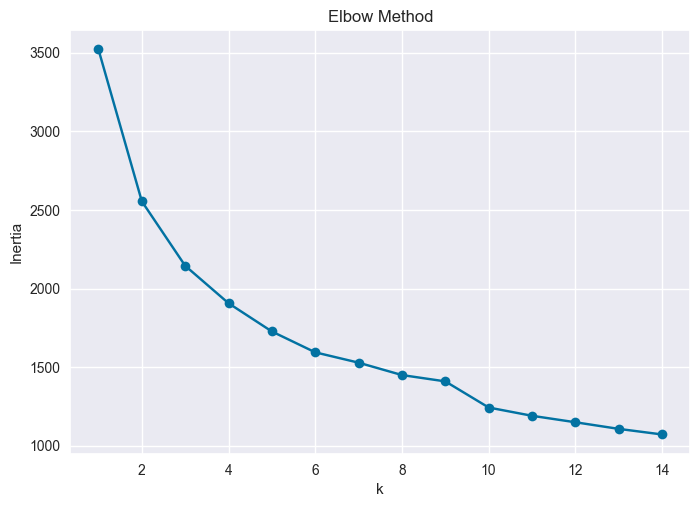

In [572]:
inertia = []  # List to store inertia values for different numbers of clusters

for k in range(1, 15):  # Loop over cluster numbers from 1 to 15
    kmeans0 = KMeans(n_clusters=k, random_state=0).fit(df_scaled)  # Fit KMeans for k clusters
    inertia.append(kmeans0.inertia_)  # Append the inertia value for the current k

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(1, 15), inertia, marker='o')  # Line plot with markers for each k
plt.xlabel('k')  # Label for the x-axis
plt.ylabel('Inertia')  # Label for the y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot

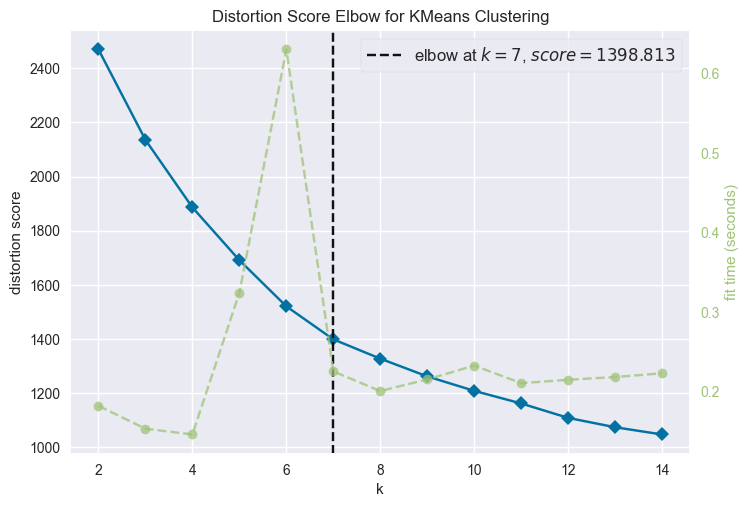

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [573]:
# Initialize the KMeans model with random state and number of initializations
kmeans = KMeans(random_state=0, n_init=20)  

# Use KElbowVisualizer to determine the optimal number of clusters (k)
elbow = KElbowVisualizer(kmeans, random_state=0, k=(2, 15))  

# Fit the model to the data
elbow.fit(df_scaled)  

# Display the elbow plot
elbow.show()  

According to the elbow method, the optimal value of \( k \) was chosen as 7.

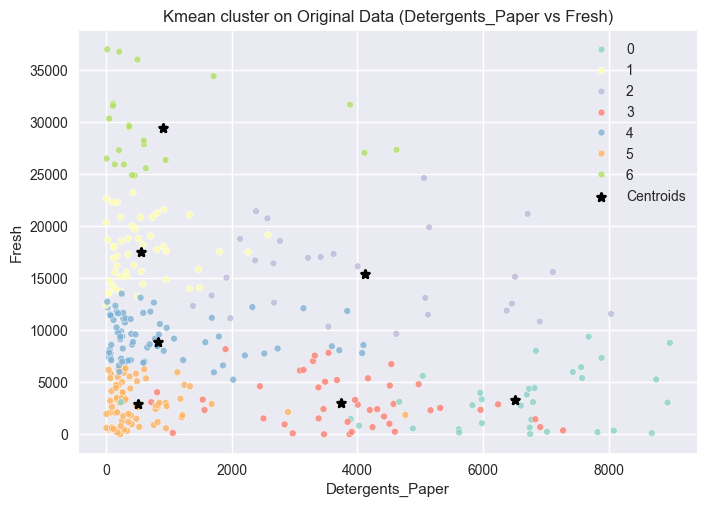

In [574]:
kmeans_od = KMeans(n_clusters=7, random_state=42)
kmeans_od.fit(df)

# Get the cluster centers (centroids) for all features
centroids = kmeans_od.cluster_centers_

# Extract centroids for the specific features: 'Detergents_Paper' and 'Fresh'
detergents_paper_idx = df.columns.get_loc('Detergents_Paper')  # Column index for 'Detergents_Paper'
fresh_idx = df.columns.get_loc('Fresh')  # Column index for 'Fresh'

# Centroids for selected features
centroids_selected = centroids[:, [detergents_paper_idx, fresh_idx]]

# The reason I chose 'Detergents_Paper' and 'Fresh' is to get the maximum variety of data possible from the dataset.
# Since this two has the least correlation which is '-0.23' (based on the heatmap; Part 1.2). 
# It will gave us better visualition for clustering than any other duo.
# I also tried with other duos and they were seeming confusing just like we expected it to be.
sns.scatterplot(x =df['Detergents_Paper'], y=df['Fresh'], hue=kmeans_od.labels_, palette='Set3', alpha=0.8, s=25)

plt.scatter(centroids_selected[:, 0], centroids_selected[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.title('Kmean cluster on Original Data (Detergents_Paper vs Fresh)')
plt.legend(loc='upper right') 
plt.show()

In [575]:
sil_score_od = silhouette_score(df, kmeans_od.labels_)
print(f"Silhouette Score Of Original Data: {sil_score_od:.2f}")

Silhouette Score Of Original Data: 0.40


*Let's also see the results with standarized data and normalized data*

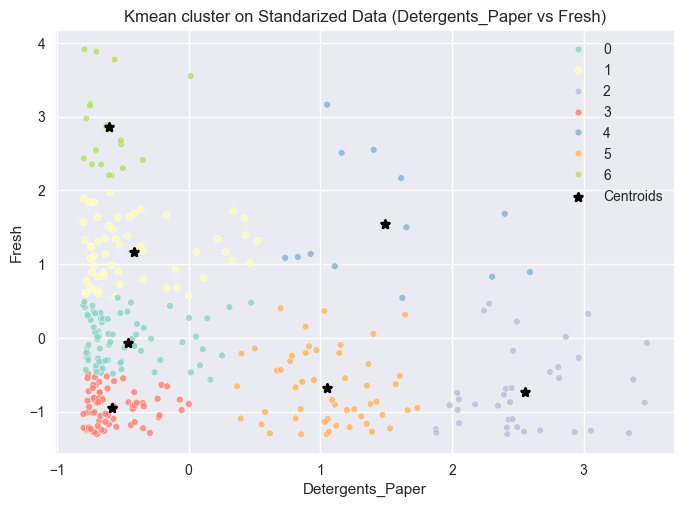

In [576]:
df_2 = df_scaled[['Detergents_Paper', 'Fresh']]
kmeans_sd = KMeans(n_clusters=7)
kmeans_sd.fit(df_2)
# Get the cluster centers (centroids)
centroids2 = kmeans_sd.cluster_centers_
sns.scatterplot(x =df_2['Detergents_Paper'], y=df_2['Fresh'], hue=kmeans_sd.labels_, palette='Set3', alpha=0.8, s=25)

plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.title('Kmean cluster on Standarized Data (Detergents_Paper vs Fresh)')
plt.legend(loc='upper right') 
plt.show()

In [577]:
sil_score_sd = silhouette_score(df_2, kmeans_sd.labels_)
print(f"Silhouette Score Of Standarized Data: {sil_score_sd:.2f}")

Silhouette Score Of Standarized Data: 0.54


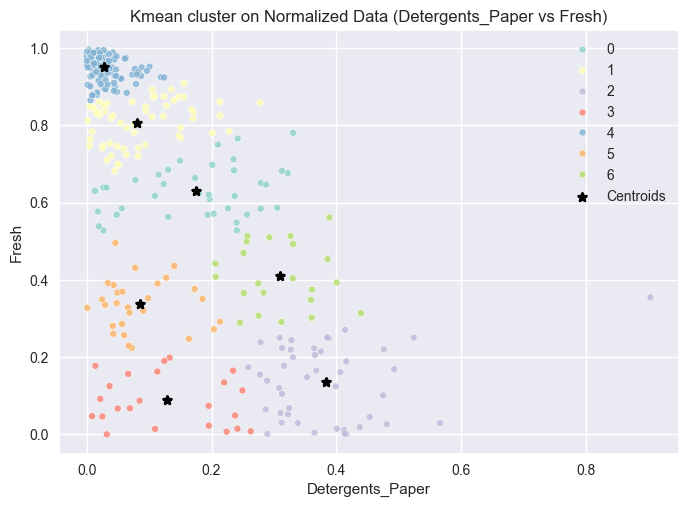

In [578]:
df_2 = normalized_df_with_col[['Detergents_Paper', 'Fresh']]
kmeans_nd = KMeans(n_clusters=7)
kmeans_nd.fit(df_2)
# Get the cluster centers (centroids)
centroids3 = kmeans_nd.cluster_centers_
sns.scatterplot(x =df_2['Detergents_Paper'], y=df_2['Fresh'], hue=kmeans_nd.labels_, palette='Set3', alpha=0.8, s=25)

plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.title('Kmean cluster on Normalized Data (Detergents_Paper vs Fresh)')
plt.legend(loc='upper right') 
plt.show()

In [579]:
sil_score_nd = silhouette_score(df_2, kmeans_nd.labels_)
print(f"Silhouette Score Of Normalized Data: {sil_score_nd:.2f}")

Silhouette Score Of Normalized Data: 0.55


As it can be seen from Silhoutte Score 'Normalization' is a slightly better method than Standarization for this dataset.

## 2.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset (15 points)

* Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

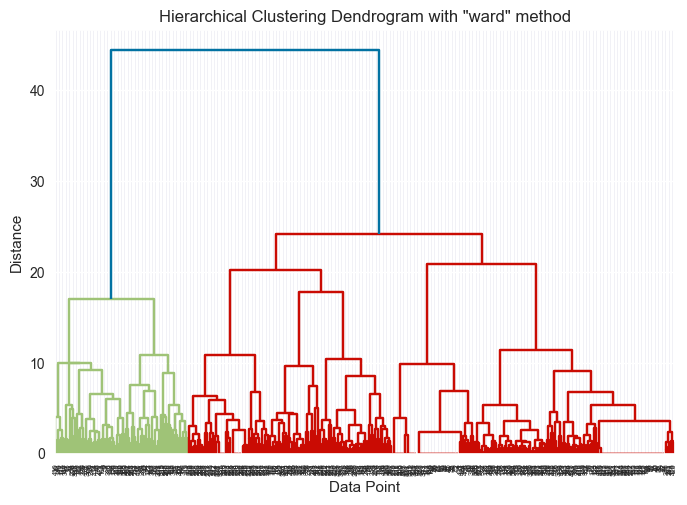

In [580]:
Z = linkage(df_scaled, 'ward')
dendrogram(Z) # Plot the dendogram

plt.title('Hierarchical Clustering Dendrogram with "ward" method')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

The dendrogram reveals tightly packed clusters, as expected from the Ward method, which aims to minimize within-cluster variance. 
The large distances between clusters at higher levels suggest well-defined separations between groups.

There are distinct intersection points at a level that can be divided into 5 clusters. It can be observed that the branch junction 
distances increase at higher levels, which shows that the differences between the clusters are distinct.

The Ward method generally gives results that are more compatible with K-Means because both methods aim to minimize the within-cluster variance.

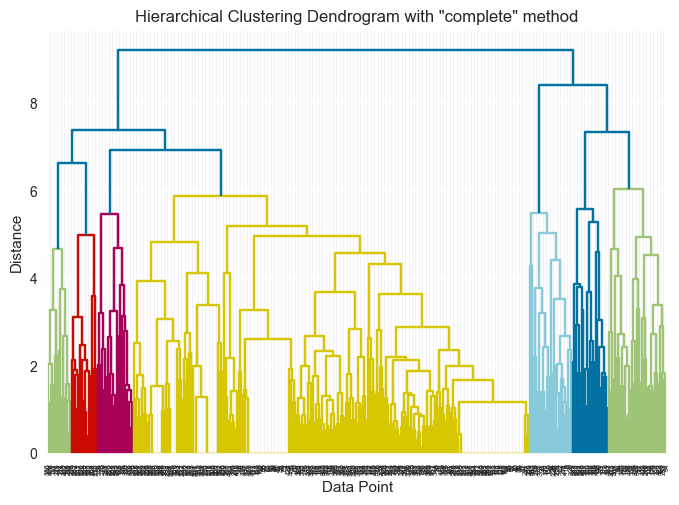

In [581]:
Z = linkage(df_scaled, 'complete')
dendrogram(Z) # Plot the dendogram

plt.title('Hierarchical Clustering Dendrogram with "complete" method')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

Using the 'farthest point' method in hierarchical clustering results in a more spread-out dendrogram. This means that the clusters are less tightly grouped compared to Ward's method, which might lead to less consistent results when comparing with K-Means.

In the Complete method, longer and more complex branching structures can be seen because it uses the longest distance between clusters. Cutting at a level where 5 clusters can be created may seem more uncertain compared to Ward.



# **PART- 3: Dimensionality Reduction (30 points)**

### *What is Dimensionality Reduction and Why is it Used?*

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### *Principal Component Analysis (PCA)*

PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance. **Process:**

* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.


***You can use scikit-learn***




## 3.1. Apply PCA (15 Pts)

* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.
* Comment on any findings

In [582]:
pca = PCA()
pca_data =pca.fit_transform(normalized_df_with_col)

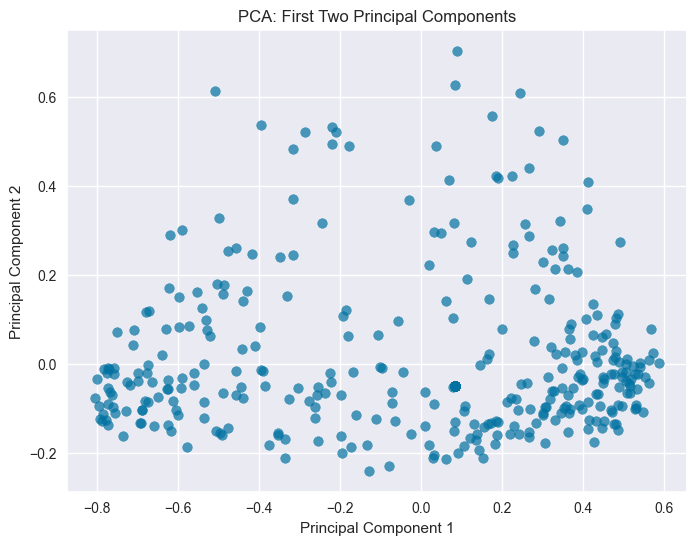

In [583]:
# Visualize data with first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()

I can see 3 or 4 clusters.

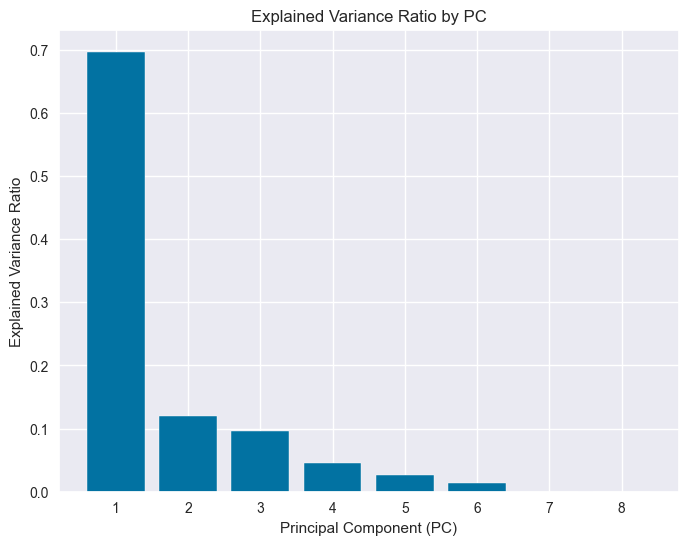

In [584]:
# Explained variance ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each PC
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)  # Use bar plot
plt.xlabel('Principal Component (PC)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PC')  
plt.show()

As we take higher PC numbers our Silhouette Score will drop down. So I will choose the best PC number that both with higher variance and Silhouette Score.
If I took first 3 components; my variance will be approximately 91,
And if I took first 4 components; my variance will bw around 95.
For variance threshold 90-95% variance are good amounts. So at this point I will check the Silhouette Score.
3 components : 0.51
4 components : 0.49


3 Components Results
---

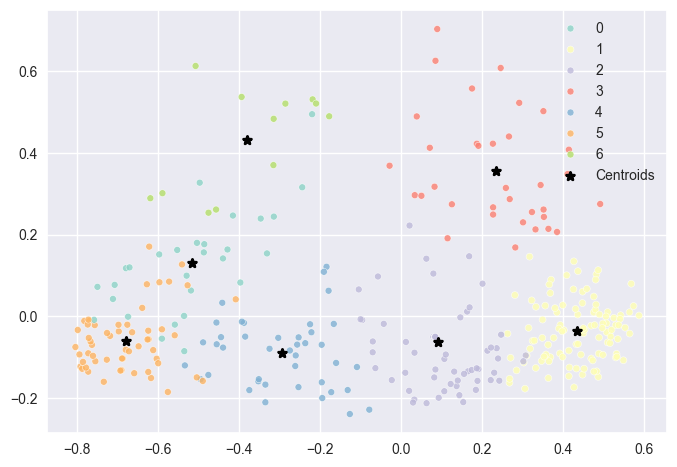

In [585]:
# Apply PCA with selected components
pca3 = PCA(n_components=3)
pca_data3 =pca3.fit_transform(normalized_df)

kmeans3 = KMeans(n_clusters=7)
kmeans3.fit(pca_data3)
centroids3 = kmeans3.cluster_centers_

sns.scatterplot(x=pca_data3[:, 0], y=pca_data3[:, 1], hue=kmeans3.labels_, palette='Set3', alpha=0.8, s=25)
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.legend(loc='upper right') 
plt.show()

In [586]:
sil_score3 = silhouette_score(pca_data3, kmeans3.labels_)
print(f"Silhouette Score: {sil_score3:.2f}")

Silhouette Score: 0.51


4 Components Results
---

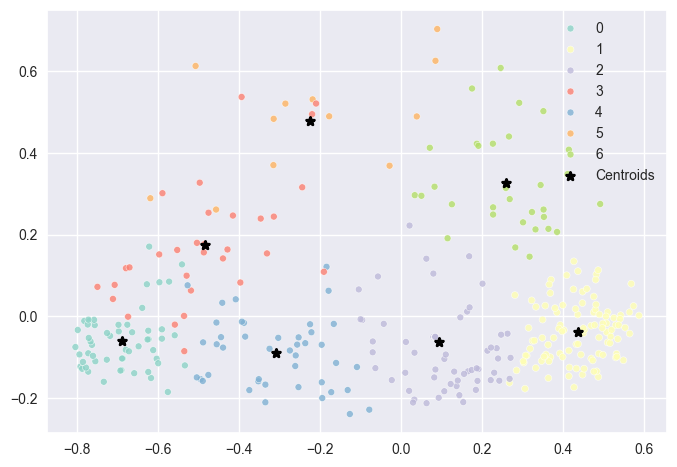

In [587]:
pca4 = PCA(n_components=4)
pca_data4 =pca4.fit_transform(normalized_df)

kmeans4 = KMeans(n_clusters=7)
kmeans4.fit(pca_data4)
centroids4 = kmeans4.cluster_centers_ 

sns.scatterplot(x=pca_data4[:, 0], y=pca_data4[:, 1], hue=kmeans4.labels_, palette='Set3', alpha=0.8, s=25)
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.legend(loc='upper right') 
plt.show()

In [588]:
sil_score4 = silhouette_score(pca_data4, kmeans4.labels_)
print(f"Silhouette Score: {sil_score4:.2f}")

Silhouette Score: 0.49


I will choose 3 as the component number. Because it has slightly better Silhouette Score than 4.
And I prefer better Silhouette Score than %4 variance.

## 3.2. K-means Clustering with PCA (15 Pts)
* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

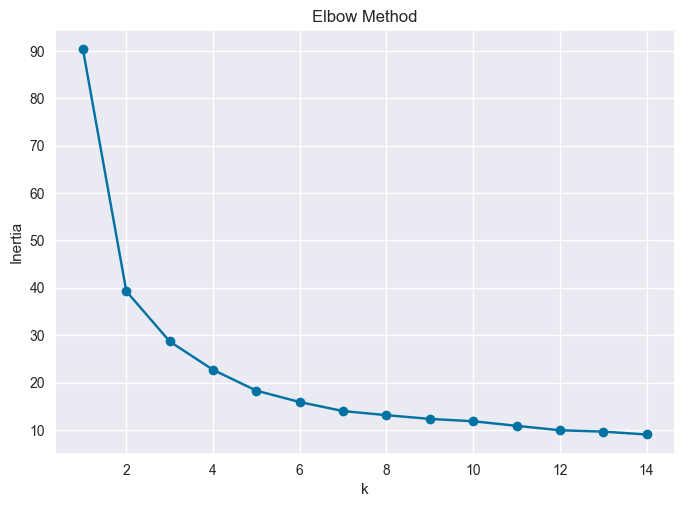

In [589]:
inertia = []  # List to store inertia values for different numbers of clusters

for k in range(1, 15):  # Loop over cluster numbers from 1 to 15
    kmeans0 = KMeans(n_clusters=k, random_state=0).fit(pca_data4)  # Fit KMeans for k clusters
    inertia.append(kmeans0.inertia_)  # Append the inertia value for the current k

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(1, 15), inertia, marker='o')  # Line plot with markers for each k
plt.xlabel('k')  # Label for the x-axis
plt.ylabel('Inertia')  # Label for the y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot

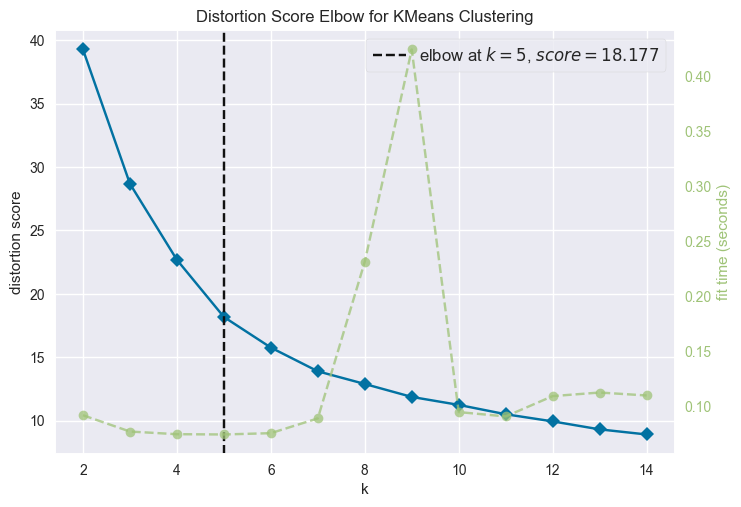

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [590]:
# Initialize the KMeans model with random state and number of initializations
kmeans = KMeans(random_state=0, n_init=10)  

# Use KElbowVisualizer to determine the optimal number of clusters (k)
elbow = KElbowVisualizer(kmeans, random_state=0, k=(2, 15))  

# Fit the model to the data
elbow.fit(pca_data4)  

# Display the elbow plot
elbow.show()  

According to the elbow method, the optimal value of \( k \) was chosen as 5.

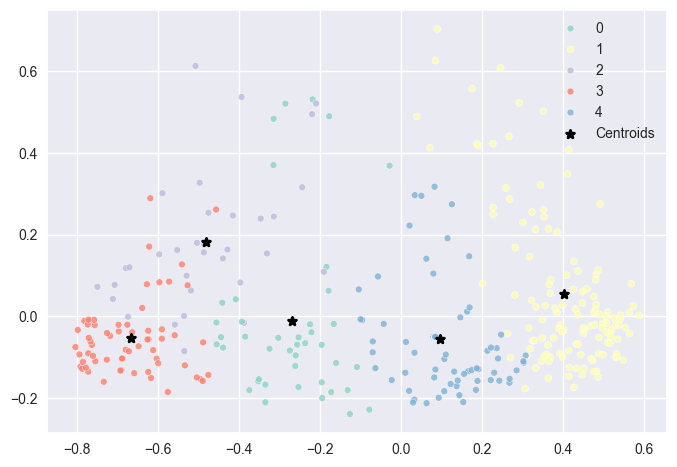

In [591]:
# Apply PCA with selected components
pca6 = PCA(n_components=3)
pca_data6 =pca6.fit_transform(normalized_df)

kmeans6 = KMeans(n_clusters=5)
kmeans6.fit(pca_data6)
centroids6 = kmeans6.cluster_centers_

sns.scatterplot(x=pca_data6[:, 0], y=pca_data6[:, 1], hue=kmeans6.labels_, palette='Set3', alpha=0.8, s=25)
plt.scatter(centroids6[:, 0], centroids6[:, 1], marker='*', s=35, linewidths=2, c='black', label='Centroids')
plt.legend(loc='upper right') 
plt.show()

In [592]:
sil_score6 = silhouette_score(pca_data6, kmeans6.labels_)
print(f"Silhouette Score: {sil_score6:.2f}")

Silhouette Score: 0.45



# **PART- 4: Evaluate the Clustering Results (20 points)**

* Evaluate and compare the clustering results (k means with and without PCA) using the Silhouette Coefficients.

* Identify which clustering method and dataset version (original vs. PCA-reduced) resulted in the best clustering.

* Discuss the impact of dimensionality reduction (PCA) on clustering performance.

* Highlight any differences in performance between K-Means and Agglomerative Clustering.

In [593]:
from sklearn.cluster import AgglomerativeClustering

X_original = normalized_df_with_col
X_pca = pca_data6


# Helper function to evaluate clustering
def evaluate_clustering(model, X):
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

# K-Means (original dataset)
kmeans_original = KMeans(n_clusters=7, random_state=42)
silhouette_kmeans_original = evaluate_clustering(kmeans_original, X_original)

# K-Means (PCA-reduced dataset)
kmeans_pca = KMeans(n_clusters=5, random_state=42)
silhouette_kmeans_pca = evaluate_clustering(kmeans_pca, X_pca)

# Agglomerative Clustering (original dataset)
hac_original = AgglomerativeClustering(n_clusters=7, linkage='ward')
silhouette_hac_original = evaluate_clustering(hac_original, X_original)

# Agglomerative Clustering (PCA-reduced dataset)
hac_pca = AgglomerativeClustering(n_clusters=5, linkage='ward')
silhouette_hac_pca = evaluate_clustering(hac_pca, X_pca)

# Print results
print("Silhouette Scores:")
print(f"K-Means (Original): {silhouette_kmeans_original:.4f}")
print(f"K-Means (PCA): {silhouette_kmeans_pca:.4f}")
print(f"Agglomerative Clustering (Original): {silhouette_hac_original:.4f}")
print(f"Agglomerative Clustering (PCA): {silhouette_hac_pca:.4f}")

Silhouette Scores:
K-Means (Original): 0.3950
K-Means (PCA): 0.4843
Agglomerative Clustering (Original): 0.4288
Agglomerative Clustering (PCA): 0.4309


**1.Identify which clustering method and dataset version resulted in the best clustering:**
The highest silhouette score was achieved by K-Means on the PCA-reduced dataset (0.4843). This suggests that this combination of clustering method and dataset version resulted in the best clustering performance, as the silhouette score reflects better-defined and more compact clusters.


**2.Discuss the impact of dimensionality reduction (PCA) on clustering performance:**
The results show that applying PCA improved clustering performance for both methods:
* **K-Means:** The silhouette score increased from 0.3950 (Original) to 0.4843 (PCA), an improvement of approximately 0.09.
* **Agglomerative Clustering:** The silhouette score increased slightly from 0.4288 (Original) to 0.4309 (PCA), an improvement of less than 0.01.
These results suggest that PCA had a more significant positive impact on K-Means clustering compared to Agglomerative Clustering. This is likely because PCA reduces dimensionality and noise, helping K-Means, which relies on distance calculations, to form better-separated clusters. On the other hand, Agglomerative Clustering, being hierarchical, may be less sensitive to the benefits of dimensionality reduction.

**3.Highlight differences in performance between K-Means and Agglomerative Clustering:**
* **On the Original Dataset:** Agglomerative Clustering outperformed K-Means, achieving a silhouette score of 0.4288 compared to K-Means’ 0.3950. This suggests that Agglomerative Clustering was better at identifying clusters in the original high-dimensional space.

* **On the PCA-Reduced Dataset:** K-Means outperformed Agglomerative Clustering, achieving a silhouette score of 0.4843 compared to 0.4309 for Agglomerative Clustering. This indicates that K-Means benefited more from the dimensionality reduction provided by PCA.


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw5.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.